**Alinhamento de imagens, que foram obtidas por diferentes técnicas de imageamento, por pontos-chaves (ORB).**

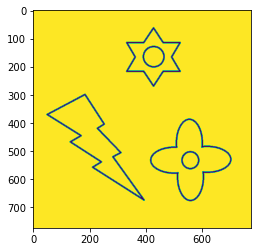

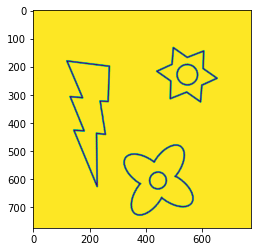

(<matplotlib.image.AxesImage at 0x299f427d340>, None)

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# ler duas imagens
img1 = cv.imread('objetos.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('objetos_rotacionado_325.jpg', cv.IMREAD_GRAYSCALE)

# Mostrar as duas imagens
plt.imshow(img1),plt.show()
plt.imshow(img2),plt.show()

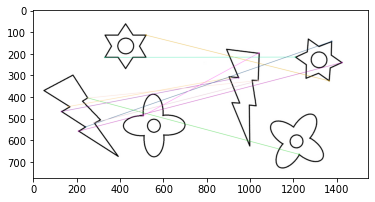

In [5]:
# Dar o ORB nelas
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Dar o Brute Force Matcher e os descriptors bf.Match(des1, des2)
bf = cv.BFMatcher (cv.NORM_HAMMING, crossCheck = True)
matches = bf.match(des1, des2)

# Ordena-os por distância
matches = sorted(matches, key = lambda x:x.distance)

# Cria variáveis com uma das dimensões do tamanho do número de matches 
matches = matches[:int(len(matches)*90)]
no_of_matches = len(matches)
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))

# Atribui o queryIdx dos kp1 dos matches da img1 à variável p1 e os trainIdx da img2 (à variável p2)
for i in range(len(matches)):
    p1[i, :] = kp1[matches[i].queryIdx].pt
    p2[i, :] = kp2[matches[i].trainIdx].pt
    
# Cria máscara, homografia e através delas cria uma imagem transformada da img1 com o alinhamento da img2
homography, mask = cv.findHomography(p1, p2, cv.RANSAC)
transformed_img = cv.warpPerspective(img1, homography, (706,705))
cv.imwrite('imagem_transformada.jpg', transformed_img)
                                     
# Desenha os 10 primeiros matches
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()
img3 = Image.fromarray(img3)
img3.save('img3.png', format = 'PNG')

Após alinhadas as imagens, saberíamos que os pixelsets de uma correspondem à mesma região de pintura dos pixelsets da outra. Assim, poderíamos extrair informações de cada pixelset das duas imagens e tratá-las conjuntamente.

Porém o alinhamento ainda não está sendo realizado da maneira correta, conforme observado na imagem abaixo:

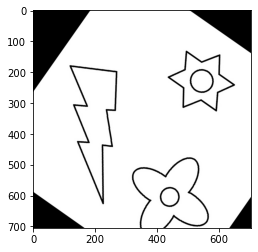

(<matplotlib.image.AxesImage at 0x299f7bfa220>, None)

In [7]:
img_transformada = cv.imread('imagem_transformada.jpg')
plt.imshow(img_transformada),plt.show()

Observa-se que a rotação foi realizada corretamente, porém a imagem foi transladada / redimensionada de forma errada (um pedaço foi para fora).